In [ ]:
### Imports
import pandas as pd
import numpy as np
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score 
from sklearn.cluster import KMeans

%matplotlib inline

### **Dataset Import**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/marketing_campaign.csv', sep = '\t')

In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

### **Data Cleaning**

In [ ]:
display(df.isnull().sum())



ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
df = df.fillna(df['Income'].mean())

In [ ]:
df.isna()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2236,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2237,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2238,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Customer Details

####Realtionship

In [ ]:
df['Marital_Status']
df.Marital_Status.unique()
df['relationship']=df['Marital_Status'].replace({'Married':1,'Together':1,'Single':0, 'Divorced':0, 'Widow':0, 'Alone':0, 'Absurd':0,'YOLO':0})
df['relationship']

0       0
1       0
2       1
3       1
4       1
       ..
2235    1
2236    1
2237    0
2238    1
2239    1
Name: relationship, Length: 2240, dtype: int64

In [ ]:
df['relationship'].value_counts(normalize=True)

1    0.644643
0    0.355357
Name: relationship, dtype: float64

-> We observe that 65% our customers are in a realationship

#### Members in household   check

We try to calculate the number of members in the household of the customer <br>We assume that its a nuclear family, meaning family comprises of customer, spouse (if any), children (if any)

In [ ]:
df['n_child'] = df.apply(lambda x: x['Kidhome'] + x['Teenhome'], axis=1)

In [ ]:
#calculating number of members in the household
def n_members(x):
    if x['Marital_Status'] == 'Married' or x['Marital_Status'] == 'Together':
        #customer+spouse+children 
        n_members = 2 + x['n_child']
    else:
        #customer + children
        n_members = 1 + x['n_child']

    return n_members

#new feature
df['n_members'] = df.apply(lambda x: n_members(x), axis=1)

#### Parent
We create a feature indicating whether the customer is a parent

In [ ]:
df['is_parent'] = ((df['Kidhome'] + df['Teenhome']) > 0).astype(int)

#### Age

We look at the birth year of customers since it will influence the type of purchases <br>
We calculate the age of customer, and divide the age feature into categories

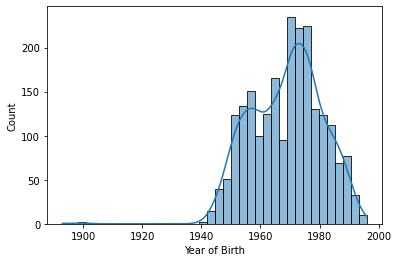

In [ ]:
sns.histplot(x='Year_Birth', data=df, kde=True);
plt.xlabel('Year of Birth');

We see some outliers in the data

In [ ]:
df[(df['Year_Birth'] < 1940)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,relationship,n_child,n_members,is_parent
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,...,0,0,1,3,11,0,0,1,2,1
239,11004,1893,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,...,0,0,0,3,11,0,0,1,2,1
339,1150,1899,PhD,Together,83532.0,0,0,26-09-2013,36,755,...,0,0,0,3,11,0,1,0,2,0


We have two options:<br>
1. drop these rows 
2. keep the datapoint and remove age feature 

We shall look at these outliers in the next section

Change this age formula

In [ ]:
#new feature
df['age'] =  2020 - df['Year_Birth']
df['age'].describe()

count    2240.000000
mean       51.194196
std        11.984069
min        24.000000
25%        43.000000
50%        50.000000
75%        61.000000
max       127.000000
Name: age, dtype: float64

-> Median age of customers is 50

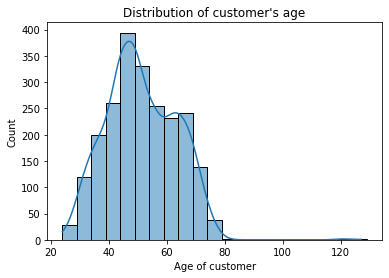

In [ ]:
#distribution
sns.histplot(x='age', data=df, kde=True, binwidth=5)
plt.xlabel('Age of customer')
plt.title("Distribution of customer's age");

We divide the customers into categories based on age group

In [ ]:
#categories
age_cat_labels = ['young', 'middle_age', 'old', 'very_old']
df['age_group'] = pd.cut(df['age'], bins = [15, 30, 50, 60, np.inf], labels = age_cat_labels, right = True, include_lowest = True)

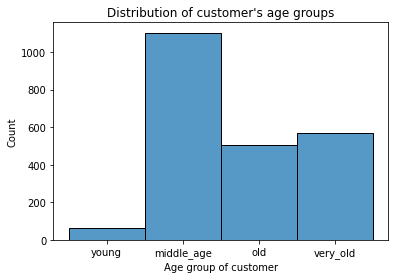

In [ ]:
#distribution
sns.histplot(x='age_group', data=df)
plt.xlabel('Age group of customer')
plt.title("Distribution of customer's age groups");

In [ ]:
df = df[(df['age'] < 90) & (df['Income'] < 200000)].reset_index()

#### Income

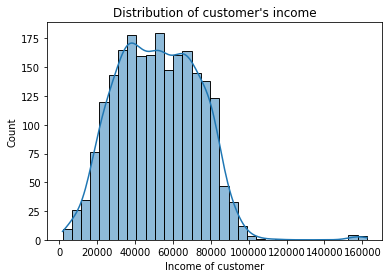

In [ ]:
#income distribution among customers
sns.histplot(x='Income', data=df, kde=True)
plt.xlabel('Income of customer')
plt.title("Distribution of customer's income");

We drop the rows with missing values in Income feature

In [ ]:
#dropping rows
df = df.dropna(axis=0)

We have outliers in this feature too. We choose to keep the outliers in this feature and reduce its effect by dropping the income feature

We divide the income into various categories

In [ ]:
income_cat = ['poor', 'lower_middle', 'middle', 'upper_middle', 'rich']
df['income_group'] = pd.cut(df['Income'], bins = [0, 15000, 40000, 65000, 90000, np.inf], 
                              labels = income_cat, right = True, include_lowest = True)

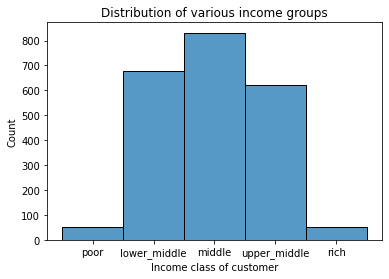

In [ ]:
#distribution
sns.histplot(x='income_group', data=df)
plt.xlabel('Income class of customer')
plt.title("Distribution of various income groups");

#### Education

In [ ]:
df.Education.unique()
df["Education"] = df["Education"].replace({'Basic':'Undergraduate', '2n Cycle':'Undergraduate', 
                                           'Graduation':'Graduated', 'Master':'Postgraduate', 'PhD':'Postgraduate'})
df['Education']

0          Graduated
1          Graduated
2          Graduated
3          Graduated
4       Postgraduate
            ...     
2231       Graduated
2232    Postgraduate
2233       Graduated
2234    Postgraduate
2235    Postgraduate
Name: Education, Length: 2236, dtype: object

### Purchases

We look at the different purchase features to figure out spending patterns of the customer

#### Total Amount Spent

In [ ]:
#total amount spent by customer in last 2 years
spend_cat = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

#total amount spent by a customer
df['total_spends'] = df[spend_cat].sum(axis=1)

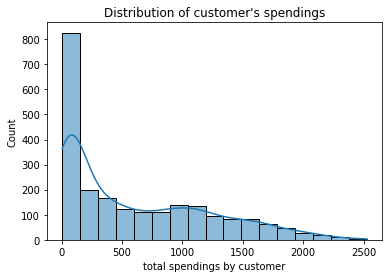

In [ ]:
#distribution
sns.histplot(x='total_spends', data=df, kde=True)
plt.xlabel('total spendings by customer')
plt.title("Distribution of customer's spendings");

In [ ]:
#We check if any customer has zero spends
print('number of customers with zero spends: {}'.format((df['total_spends'] == 0).sum()))

number of customers with zero spends: 0


In [ ]:
#revenue of company from different income groups
df.groupby(['income_group'])['total_spends'].sum()

income_group
poor              5387
lower_middle     63246
middle          418092
upper_middle    784730
rich             83531
Name: total_spends, dtype: int64

We see that more than 50% of the revenue earned by the company comes from upper middle class income group of customers

#### Total purchases

We calculate the total number of purchases made by the customer

In [ ]:
purchase_mode= ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']

#counting the number of purchases
df['n_purchases'] = df[purchase_mode].sum(axis=1)

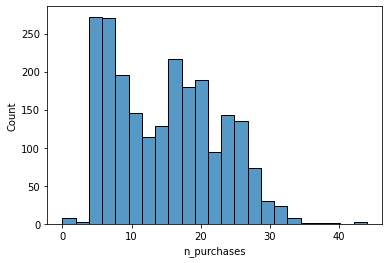

In [ ]:
#distribution
sns.histplot(x='n_purchases', data=df);

##### Zero Purchases

In [ ]:
#do any customer have zero number of purchases
print('customers with zero purchases: {}'.format((df['n_purchases']==0).sum()))

customers with zero purchases: 4


Since there was no customer with zero spends, these customers have spent money. <br>
We check their total spends and replace the number of purchases with appropriate amount

In [ ]:
df.loc[df['n_purchases']==0, ['total_spends']]

,total_spends
652,6
978,6
1521,5
2129,8


We see that the total amount of money spent is quite less, we assume that the number of purchases might have been 1

In [ ]:
df['n_purchases'].replace(0, 1, inplace=True)

We look at the average number of purchases made by each customer according to their income class

In [ ]:
(df.groupby(['income_group'])['n_purchases'].sum() / df['income_group'].value_counts())

poor             8.750000
lower_middle     7.823270
middle          16.160048
upper_middle    20.895498
rich            20.500000
dtype: float64

 - We observe that poor and lower middle class customers have almost half the average number of purchases per customer compared to other income groups 

#### Mode of Purchase

##### Catalog Purchases

We create a new feature indicating proportion number of purchases through catalog to total purchases 

In [ ]:
#new feature
df['catalog_ratio'] = df.apply(lambda x: x['NumCatalogPurchases']/x['n_purchases'], axis=1)

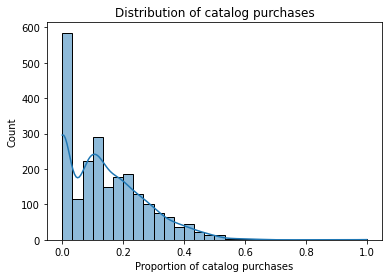

In [ ]:
#distribution
sns.histplot(x='catalog_ratio', kde=True, data=df)
plt.xlabel('Proportion of catalog purchases')
plt.title("Distribution of catalog purchases");

##### Store Purchases

We create a new feature denoting the proportion of purchases made through store to total purchases

In [ ]:
#new feature
df['store_ratio'] = df.apply(lambda x: x['NumStorePurchases']/x['n_purchases'], axis=1)

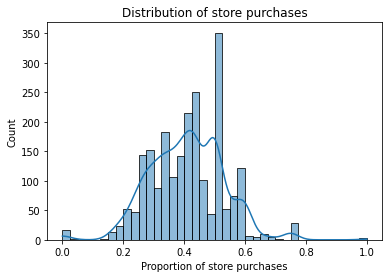

In [ ]:
sns.histplot(x='store_ratio', kde=True, data=df)
plt.xlabel('Proportion of store purchases')
plt.title("Distribution of store purchases");

##### Web Purchases

We create a new feature denoting the proportion of purchases made through websites to total purchases

In [ ]:
#new feature
df['web_ratio'] = df.apply(lambda x: x['NumWebPurchases']/x['n_purchases'], axis=1)

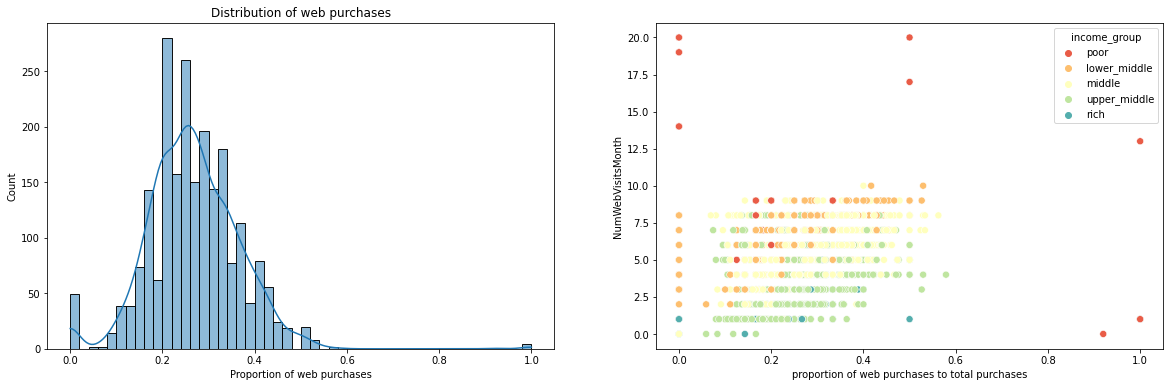

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(20,6))

sns.histplot(x='web_ratio', kde=True, data=df, ax=ax1)
ax1.set_xlabel('Proportion of web purchases')
ax1.set_title("Distribution of web purchases");

sns.scatterplot(x='web_ratio', y='NumWebVisitsMonth', data=df, hue='income_group', palette='Spectral', s=50, ax=ax2);
ax2.set_xlabel('proportion of web purchases to total purchases');

- We observe that lower income class have higher number of web visits compared to upper income classes and yet the number of web purchases made by each group is similar

##### Discount Purchases

We have a feature 'NumDealsPurchases; indicating number of purchases made with a discount <br> We create a feature denoting ratio of purchases made with discount

In [ ]:
#new feature
df['deals_ratio'] = df.apply(lambda x: x['NumDealsPurchases']/x['n_purchases'], axis=1)

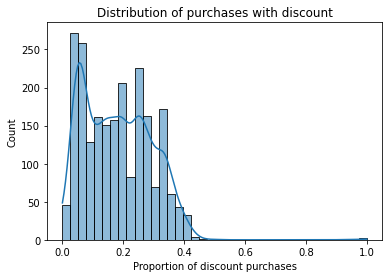

In [ ]:
#distribution
sns.histplot(x='deals_ratio', kde=True, data=df)
plt.xlabel('Proportion of discount purchases')
plt.title("Distribution of purchases with discount");

#### Type of purchase

We look at the distribution of sales product wise

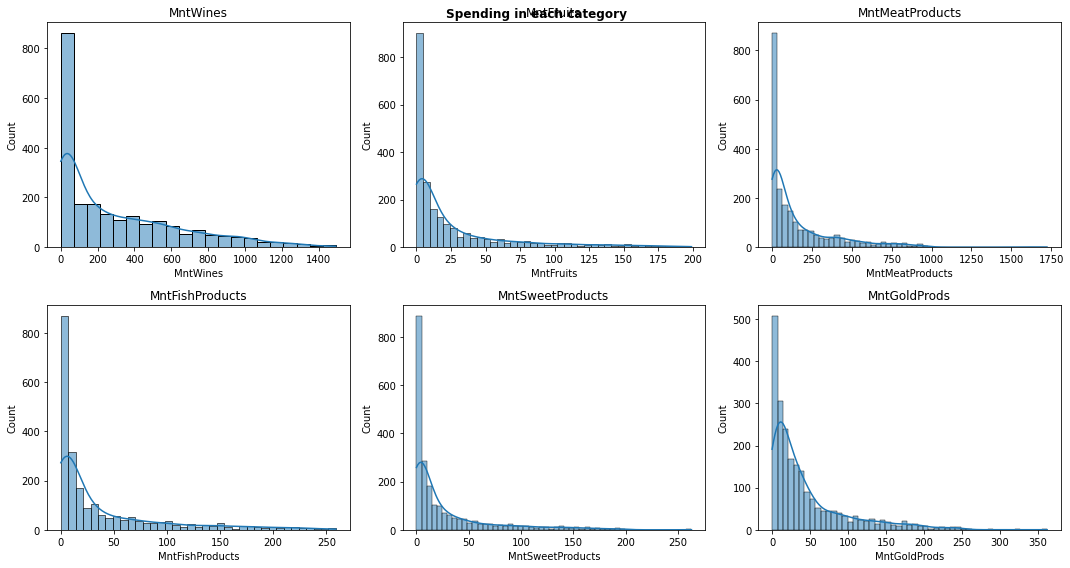

In [ ]:
fig,axs = plt.subplots(2,3,figsize=(15, 8))
axs = axs.ravel()
for spend, ax in zip(spend_cat, axs):
    fig.suptitle('Spending in each category',fontweight ="bold")
    sns.histplot(df[spend], ax=ax, kde=True)
    #title of subplot
    ax.set_title(spend)
plt.tight_layout()

Insted of looking at amount spent of each category, we look at the proportion of spends in each category

In [ ]:
total_spends = df['total_spends']
for col in spend_cat:
    df[col] /= total_spends

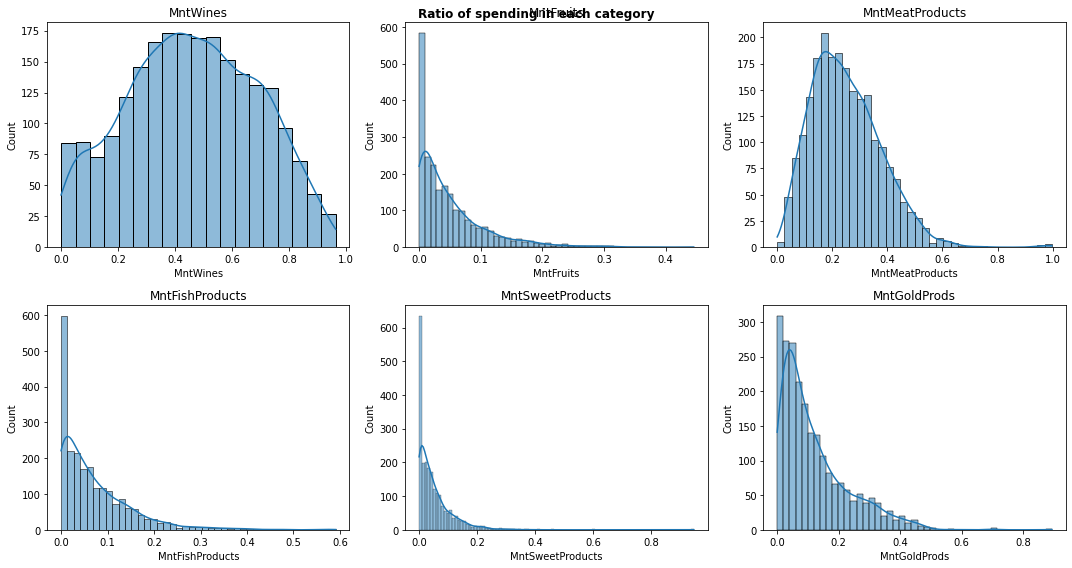

In [ ]:
#distribution
fig,axs = plt.subplots(2,3,figsize=(15, 8))
axs = axs.ravel()
for spend, ax in zip(spend_cat, axs):
    fig.suptitle('Ratio of spending in each category',fontweight ="bold")
    sns.histplot(df[spend], ax=ax, kde=True)
    #title of subplot
    ax.set_title(spend)
plt.tight_layout()

#### Spendings compared to Income

We calculate as to how much portion of annual income is spent by customer

In [ ]:
#creating new feature
df['spend_ratio'] = df['total_spends'] /  (2*df['Income'])

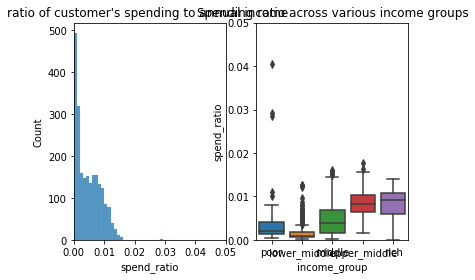

In [ ]:
#distribution
fig,ax = plt.subplots(1,2)
ax = ax.ravel()
ax1, ax2 = ax[0], ax[1]

sns.histplot(x='spend_ratio', data=df, ax=ax1)
ax1.set_xlim([0, 0.05])
ax1.set_title("ratio of customer's spending to annual income ")

sns.boxplot(x='income_group', y='spend_ratio', data=df, ax=ax2)
ax2.set_ylim([0, 0.05])
ax2.set_title('Spending ratio across various income groups');


### **Creating New Features**

In [ ]:
df['total_spent'] = df['MntWines']  + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# Create a feature with the % of money spent on essential item (food-related) 
df['pct_essentials'] = (df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'])/df['total_spent']

# Create a feature with the number of purchases for each client
df['num_purchases'] = df['NumWebPurchases']+df['NumCatalogPurchases'] + df['NumStorePurchases']+df['NumWebVisitsMonth']

# Create a feature with the number of children
df['num_children'] = df['Kidhome'] + df['Teenhome']

# Create a feature with the percentage of purchases made with a discount
df['pct_purchases_with_discount'] = df['NumDealsPurchases'] / df['num_purchases']
df['pct_purchases_with_discount'].fillna(0, inplace=True)



Dropping columns as the offers are not related to percentage of purchases with discount

### **PCA and K-means**

In [ ]:
df.columns

Index(['index', 'ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'relationship', 'n_child', 'n_members', 'is_parent', 'age', 'age_group',
       'income_group', 'total_spends', 'n_purchases', 'catalog_ratio',
       'store_ratio', 'web_ratio', 'deals_ratio', 'spend_ratio', 'cluster',
       'total_spent', 'pct_essentials', 'num_purchases', 'num_children',
       'pct_purchases_with_discount'],
      dtype='object')

In [ ]:
ds = df.copy()
ds.drop(
    ['Dt_Customer','Kidhome', 'Teenhome', 'ID', 'Year_Birth', 'Marital_Status', 'Income','index',
     'age', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
     'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
    ], axis=1, inplace=True)
#'web_ratio', 'catalog_ratio', 'discou

In [ ]:
ds.columns

Index(['Education', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumWebVisitsMonth', 'Complain', 'Z_CostContact', 'Z_Revenue',
       'Response', 'relationship', 'n_child', 'n_members', 'is_parent',
       'age_group', 'income_group', 'total_spends', 'n_purchases',
       'catalog_ratio', 'store_ratio', 'web_ratio', 'deals_ratio',
       'spend_ratio', 'cluster', 'total_spent', 'pct_essentials',
       'num_purchases', 'num_children', 'pct_purchases_with_discount'],
      dtype='object')

In [ ]:
#encoding age group feature
ds['age_group'] = ds['age_group'].replace({'young': 1, 'middle_age': 2 , 'old': 3, 'very_old': 4}).astype(int)

#encoding Education feature
ds['Education'] = ds['Education'].replace({'Undergraduate': 1, 'Graduated': 2, 'Postgraduate': 3}).astype(int)

#encoding income group feature
ds['income_group'] = ds['income_group'].replace({'poor': 1, 'lower_middle': 2, 'middle': 3, 'upper_middle': 4, 'rich': 5}).astype(int)

In [ ]:
### Standardization
sc = StandardScaler()
ds_scaled = pd.DataFrame(sc.fit_transform(ds), columns = ds.columns)

In [ ]:
pca = PCA(n_components=4)
ds_pca = pca.fit_transform(ds_scaled)
ds_pca = pd.DataFrame(pca.transform(ds_scaled),
                      columns = (["PC1", "PC2", "PC3", "PC4"]))
ds_pca.head(10)

,PC1,PC2,PC3,PC4
0,4.337812,-0.014039,2.934627,-1.436914
1,-2.825975,-0.354236,-0.257281,0.519658
2,2.803033,0.096324,-0.614931,-0.903035
3,-1.891117,2.980424,-0.172655,0.970326
4,-0.650999,-0.324084,1.077446,1.443895
5,0.573755,-2.503561,-0.489283,-0.170329
6,0.298171,0.110166,1.522945,-0.285188
7,-1.795167,-0.487277,-0.233982,-0.849185
8,-1.271708,0.378469,0.778856,-1.179687
9,-5.541364,-2.489028,2.790119,-3.459925


Elbow method

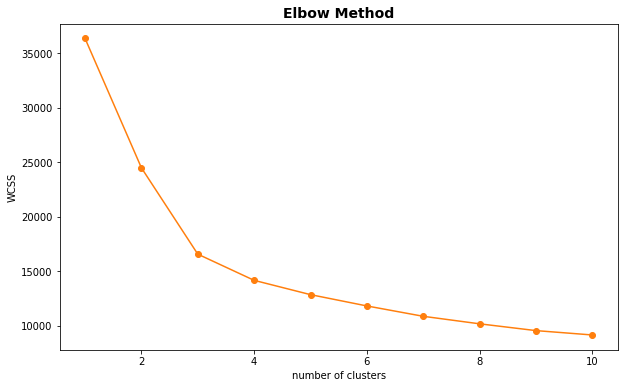

In [ ]:
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=123)
    kmeans.fit(ds_pca)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss, marker='o', color = 'tab:orange')
plt.title('Elbow Method', fontsize = 14, fontweight = 'bold')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

Silhouette Scores

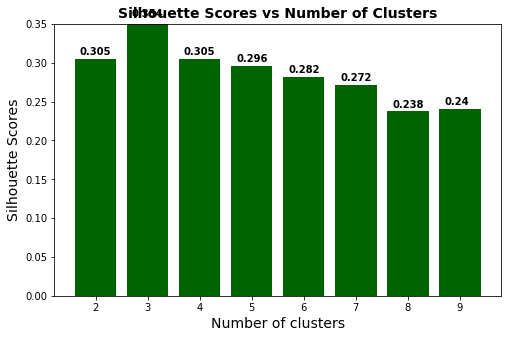

In [ ]:
silhouette_scores = []

for i in range(2,10):
    m1 = KMeans(n_clusters=i, random_state=123)
    c = m1.fit_predict(ds_pca)
    silhouette_scores.append(silhouette_score(ds_pca, m1.fit_predict(ds_pca)))

plt.figure(figsize = (8,5))
plt.bar(range(2,10), silhouette_scores, color = 'darkgreen')
plt.title("Silhouette Scores vs Number of Clusters", fontsize = 14, fontweight = 'bold')
plt.xlabel('Number of clusters', fontsize = 14) 
plt.ylabel('Silhouette Scores', fontsize = 14)
plt.ylim(0,0.35)
for a, b in enumerate(silhouette_scores):
    plt.text(a + 1.7, b + 0.005, str(round(b,3)), color='black', fontweight='bold')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=123).fit(ds_pca)
pred = kmeans.predict(ds_pca)
ds['cluster'] = pred + 1
df['cluster']=pred+1
df.head()

,index,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,store_ratio,web_ratio,deals_ratio,spend_ratio,cluster,total_spent,pct_essentials,num_purchases,num_children,pct_purchases_with_discount
0,0,5524,1957,Graduated,Single,58138.0,0,0,04-09-2012,58,...,0.160000,0.320000,0.120000,0.013907,2,1.0,0.552876,29,0,0.103448
1,1,2174,1954,Graduated,Single,46344.0,1,1,08-03-2014,38,...,0.333333,0.166667,0.333333,0.000291,3,1.0,0.370370,9,2,0.222222
2,2,4141,1965,Graduated,Together,71613.0,0,0,21-08-2013,26,...,0.476190,0.380952,0.047619,0.005418,2,1.0,0.396907,24,0,0.041667
3,3,6182,1984,Graduated,Together,26646.0,1,0,10-02-2014,26,...,0.500000,0.250000,0.250000,0.000995,1,1.0,0.698113,12,1,0.166667
4,4,5324,1981,Postgraduate,Married,58293.0,1,0,19-01-2014,94,...,0.315789,0.263158,0.263158,0.003620,3,1.0,0.554502,19,1,0.263158


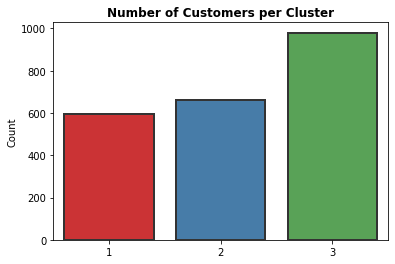

In [ ]:
aux = df.cluster.value_counts()/len(df.count())
plt.title('Number of Customers per Cluster', fontweight = 'bold')
aux = df.groupby('cluster').size().reset_index()#.rename({'pct_essentials':'count'}, axis = 1)
ax = sns.barplot(x='cluster', data=aux, y = 0, linewidth=2, edgecolor=".2",  palette = 'Set1').set(ylabel="Count", xlabel = None)

In [ ]:
clusters_evaluation = df.groupby('cluster').mean().T
clusters_evaluation['mean_dataset'] = df.mean().T
clusters_evaluation

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


cluster,1,2,3,mean_dataset
index,1098.892074,1112.239819,1138.386735,1120.159660
ID,5514.241147,5625.319759,5609.684694,5589.008497
Year_Birth,1975.035413,1967.675716,1966.011224,1968.898032
Income,30596.324210,73785.518112,50125.922722,51961.906544
Kidhome,0.728499,0.025641,0.555102,0.444097
Teenhome,0.258010,0.197587,0.866327,0.506708
Recency,49.807757,49.880845,48.180612,49.116279
MntWines,0.210637,0.437784,0.623156,0.458789
MntFruits,0.091706,0.050757,0.022919,0.049416
MntMeatProducts,0.252549,0.319639,0.200277,0.249532


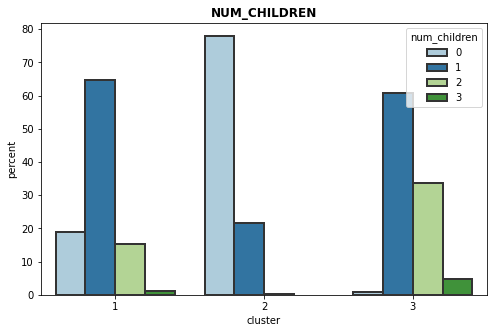

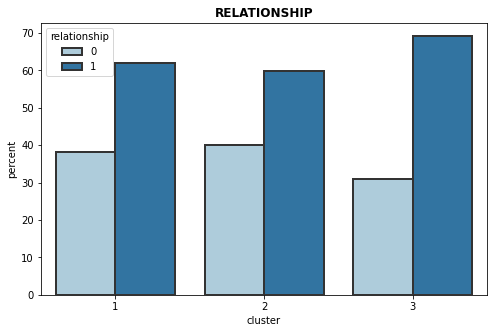

In [ ]:
cat_columns = ['num_children', 'relationship']
num_columns = ['Income','total_spent','num_purchases', 
       'pct_purchases_with_discount', 'age', 'pct_essentials']

for cat in cat_columns:
    plt.figure(figsize = (8,5))
    plt.title(str.upper(cat), fontweight = 'bold')
    df_aux = df.groupby('cluster')[cat].value_counts(normalize=True).mul(100).rename('percent').reset_index()
    sns.barplot(data = df_aux, x='cluster',y='percent',hue=cat, palette = 'Paired',linewidth=2, edgecolor=".2");
    plt.show()    

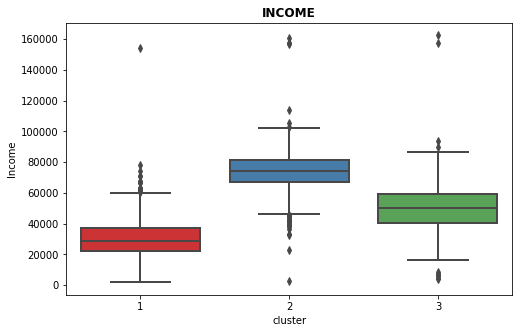

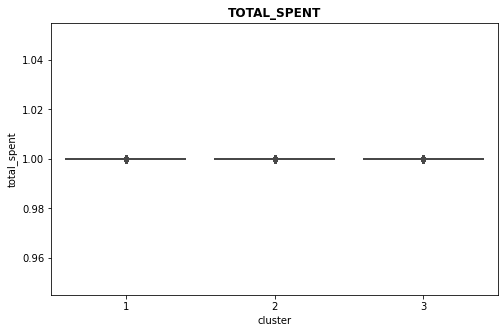

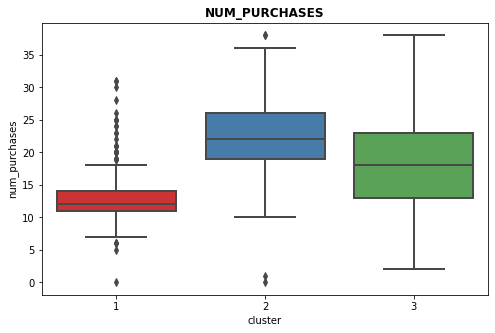

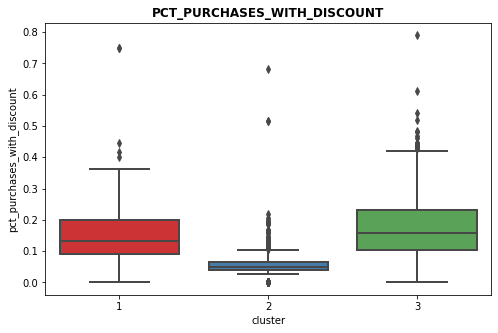

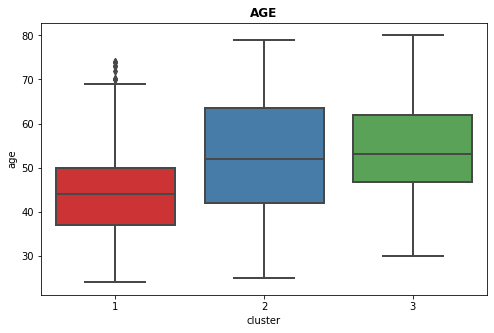

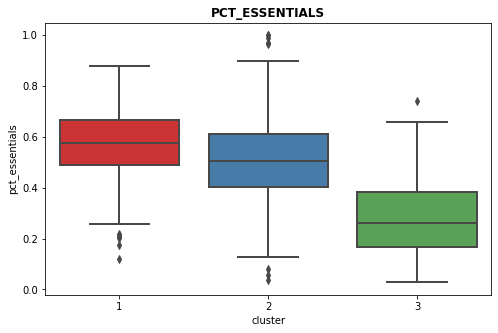

In [ ]:
for num in num_columns:
    plt.figure(figsize = (8,5))
    plt.title(str.upper(num), fontweight = 'bold')
    ax = sns.boxplot(y=num, x = 'cluster', data=df, palette = 'Set1', linewidth = 2)#.set(ylabel="Count", xlabel = None)
    plt.show()

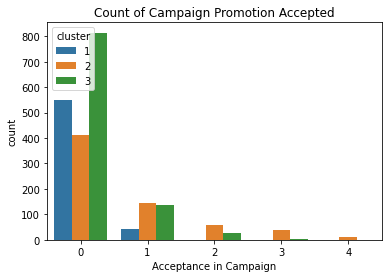

In [ ]:
df['total_camp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3']+ df['AcceptedCmp4']+ df['AcceptedCmp5']

sns.countplot(x='total_camp', hue='cluster', data=df)
plt.xlabel('Acceptance in Campaign')
plt.title('Count of Campaign Promotion Accepted');

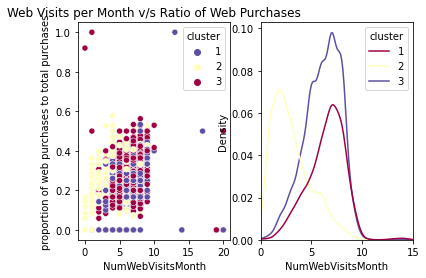

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2)

sns.scatterplot(y='web_ratio', x='NumWebVisitsMonth', data=df, hue='cluster', palette='Spectral_r', ax=ax1)
ax1.set_ylabel('proportion of web purchases to total purchases')
ax1.set_title('Web Visits per Month v/s Ratio of Web Purchases')

sns.kdeplot(x='NumWebVisitsMonth', data=df, hue='cluster', palette='Spectral', ax=ax2)
ax2.set_xlim([0, 15]);

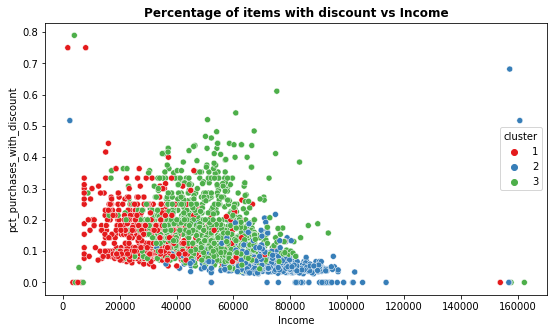

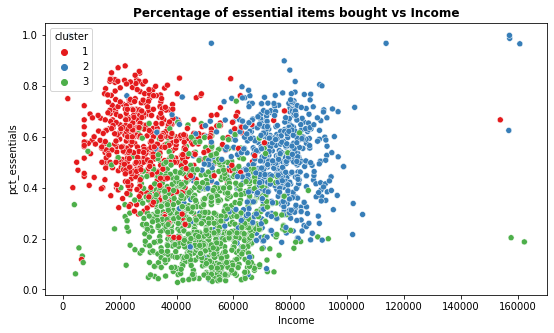

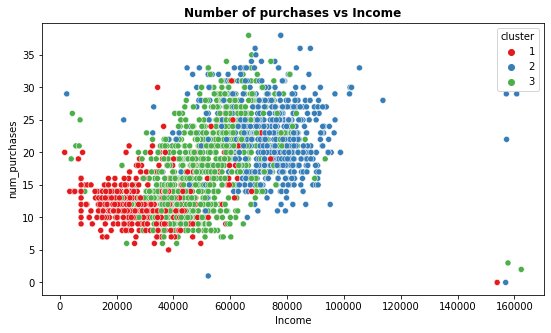

In [ ]:
plt.figure(figsize = (9,5))
plt.title('Percentage of items with discount vs Income', fontweight = 'bold')
sns.scatterplot(data = df, x = 'Income', y = 'pct_purchases_with_discount', hue = 'cluster', palette = 'Set1')
plt.show()

plt.figure(figsize = (9,5))
plt.title('Percentage of essential items bought vs Income', fontweight = 'bold')
sns.scatterplot(data = df, x = 'Income', y = 'pct_essentials', hue = 'cluster', palette = 'Set1')
plt.show()

plt.figure(figsize = (9,5))
plt.title('Number of purchases vs Income', fontweight = 'bold')
sns.scatterplot(data = df, x = 'Income', y = 'num_purchases', hue = 'cluster', palette = 'Set1')
plt.show()


In [ ]:
df.columns

Index(['index', 'ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'relationship', 'n_child', 'n_members', 'is_parent', 'age', 'age_group',
       'income_group', 'total_spends', 'n_purchases', 'catalog_ratio',
       'store_ratio', 'web_ratio', 'deals_ratio', 'spend_ratio', 'cluster',
       'total_spent', 'pct_essentials', 'num_purchases', 'num_children',
       'pct_purchases_with_discount', 'total_camp'],
      dtype='object')